In [1]:
#Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
#Read the data
df = pd.read_csv("marketing_AB.csv")

In [4]:
#Check first 5 row for observations
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
#Check if we have duplicates with respect to user id (user id should be unique)
df.duplicated(subset = "user id").sum()

0

In [6]:
#Check number of row in the dataset
df.shape[0]

588101

In [7]:
#Drop unwanted column
df.drop(["Unnamed: 0", "user id"], axis = 1, inplace = True)

In [8]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [9]:
#Check if the categorical variables have appropriate number of levels
df_cat = df[["test group", "converted", "most ads day", "most ads hour"]]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [10]:
df_cat["most ads day"].unique()

array(['Monday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday',
       'Thursday'], dtype=object)

In [11]:
#Returns the number of occurrences of each value before replacement
df_cat["most ads day"].value_counts()

Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: most ads day, dtype: int64

In [12]:
#Replace value "Tuesda" to "Tuesday"
df_cat['most ads day'] = df_cat['most ads day'].replace('Tuesda', 'Tuesday')

<ipython-input-12-455ec6c62fe6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['most ads day'] = df_cat['most ads day'].replace('Tuesda', 'Tuesday')


In [13]:
df_cat["most ads day"].value_counts()

Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: most ads day, dtype: int64

In [14]:
#Check all column values
for i in df_cat.columns:
  print(i, ":", df_cat[i].unique())

test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# **Univariate Analysis**
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

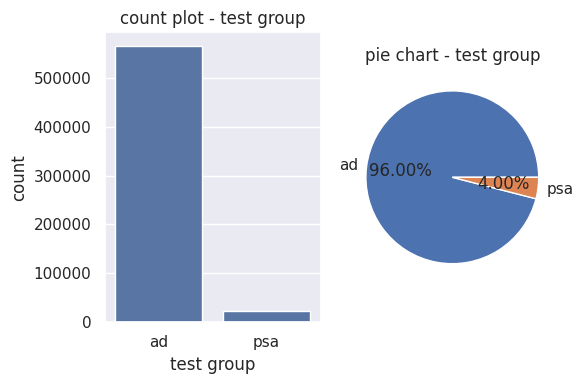

In [15]:
variable = "test group"

plt.figure(figsize = (6, 4))
#Count plot
plt.subplot(1, 2, 1)
sns.countplot(x= variable, data= df_cat)
plt.title(f"count plot - {variable}")

#Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct= "%0.2f%%")
plt.title(f"pie chart - {variable}")

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()

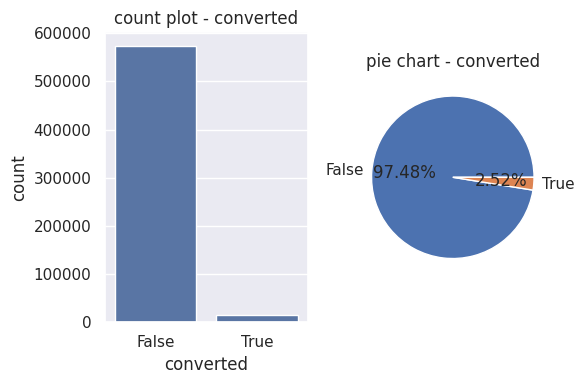

In [16]:
variable = "converted"

plt.figure(figsize = (6, 4))
#Count plot
plt.subplot(1, 2, 1)
sns.countplot(x= variable, data= df_cat)
plt.title(f"count plot - {variable}")

#Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct= "%0.2f%%")
plt.title(f"pie chart - {variable}")

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()

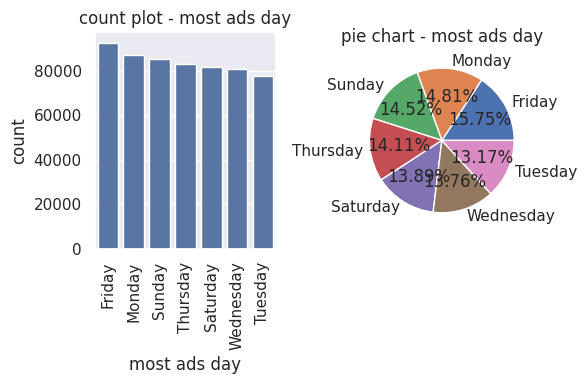

In [17]:
variable = "most ads day"

plt.figure(figsize = (6, 4))
#Count plot
plt.subplot(1, 2, 1)
sns.countplot(x= variable, data= df_cat, order= df_cat[variable].value_counts().index)
plt.title(f"count plot - {variable}")
plt.xticks(rotation = 90)

#Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct= "%0.2f%%")
plt.title(f"pie chart - {variable}")

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()

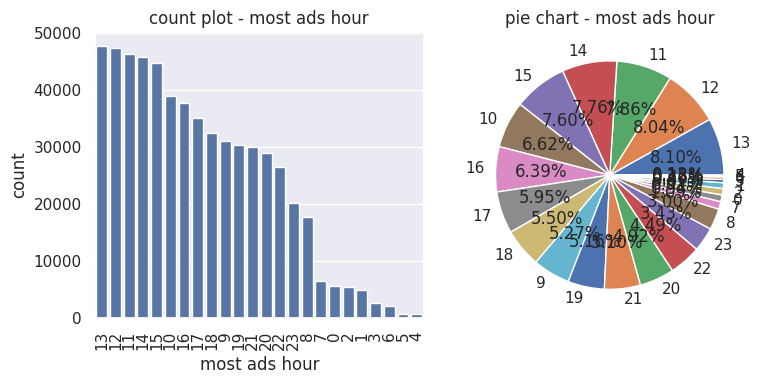

In [18]:
variable = "most ads hour"

plt.figure(figsize = (8, 4))
#Count plot
plt.subplot(1, 2, 1)
sns.countplot(x= variable, data= df_cat, order= df_cat[variable].value_counts().index)
plt.title(f"count plot - {variable}")
plt.xticks(rotation = 90)

#Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct= "%0.2f%%")
plt.title(f"pie chart - {variable}")

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()

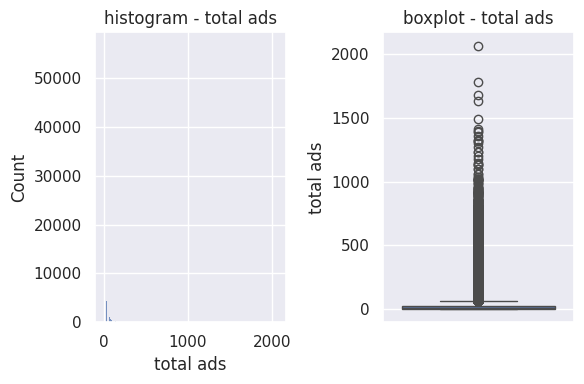

In [19]:
variable = "total ads"

plt.figure(figsize = (6, 4))
#Count plot
plt.subplot(1, 2, 1)
sns.histplot(x= variable, data= df)
plt.title(f"histogram - {variable}")

#Pie chart
plt.subplot(1, 2, 2)
sns.boxplot(y= variable, data= df)
plt.title(f"boxplot - {variable}")

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()

In [20]:
df["total ads"].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

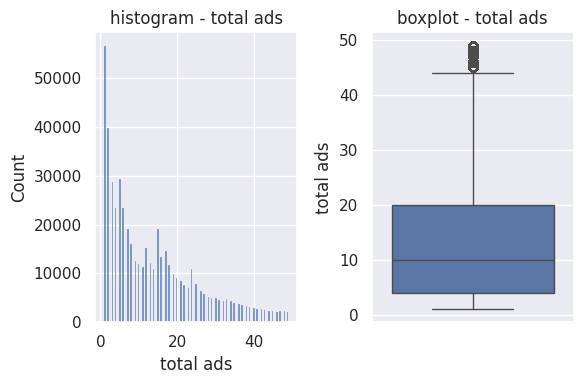

In [21]:
variable = "total ads"

plt.figure(figsize = (6, 4))
#Count plot
plt.subplot(1, 2, 1)
sns.histplot(x= variable, data= df[df[variable]<50])
plt.title(f"histogram - {variable}")

#Pie chart
plt.subplot(1, 2, 2)
sns.boxplot(y= variable, data= df[df[variable]<50])
plt.title(f"boxplot - {variable}")

#Adjust layout
plt.tight_layout()

#Show the plot
plt.show()

# **Bivariate Analysis**
Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

In [22]:
df.columns
#"converted" is the target/class

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [23]:
ct_conversion_test_group = pd.crosstab(df["test group"], df["converted"], normalize = "index")
ct_conversion_test_group
#how to read the result =
#of the people who have seen the "ad" 2,5% people have purchased
#of the people who have seen the "psa" (public service announcement) only 1,7% people have purchased

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

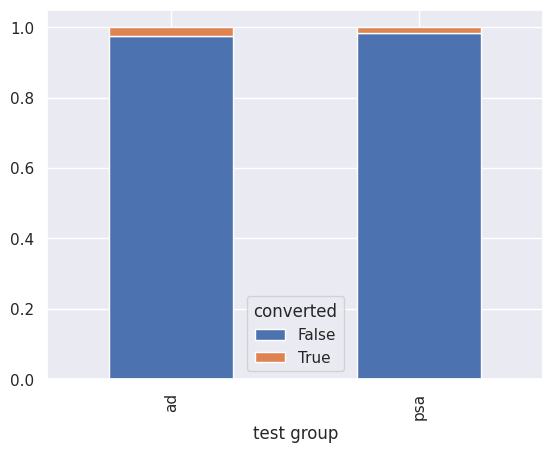

In [25]:
ct_conversion_test_group.plot(kind="bar", stacked= True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

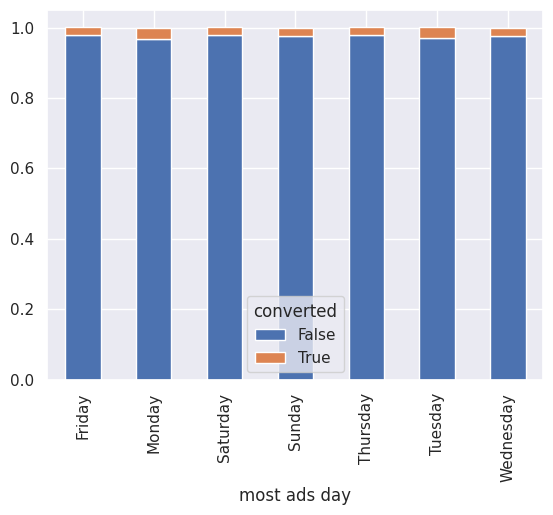

In [26]:
ct_conversion_test_group = pd.crosstab(df["most ads day"], df["converted"], normalize = "index")
print(ct_conversion_test_group.sort_values(by= True, ascending= False))
ct_conversion_test_group.plot(kind="bar", stacked= True)
#monday is the day when maximum conversion happened, and so on (sorted)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

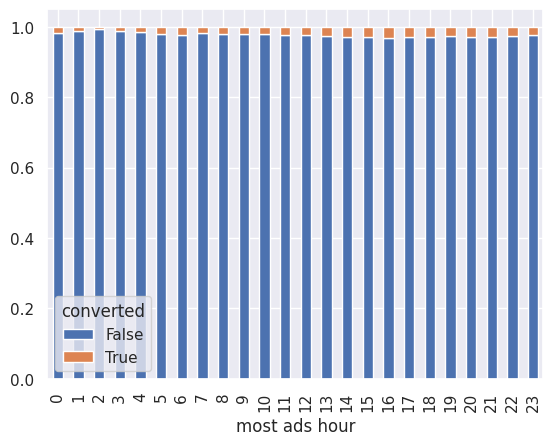

In [27]:
ct_conversion_test_group = pd.crosstab(df["most ads hour"], df["converted"], normalize = "index")
print(ct_conversion_test_group.sort_values(by= True, ascending= False))
ct_conversion_test_group.plot(kind="bar", stacked= True)
#4 PM is the hour when maximum conversion happened, and so on (sorted)

<Axes: xlabel='converted', ylabel='total ads'>

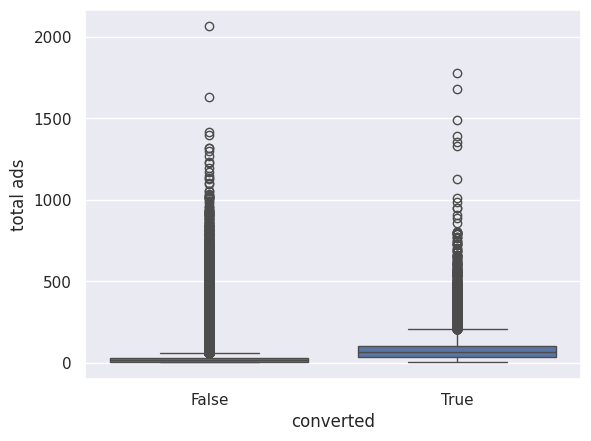

In [28]:
sns.boxplot(x= "converted", y= "total ads", data= df)

<Axes: xlabel='converted', ylabel='total ads'>

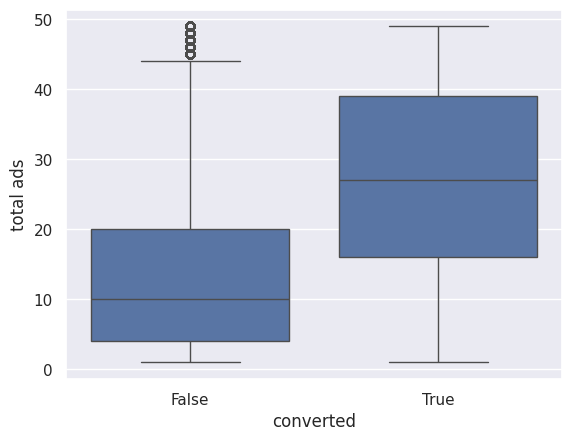

In [29]:
sns.boxplot(x= "converted", y= "total ads", data= df[df["total ads"] <50])
#number of people who have purchased are the people who see the ads more frequently, repeated targeting seems helped

# **Statistical Test**

In [37]:
from scipy.stats import chi2_contingency
alpha = 0.05 #level of significance
num = 0
for variable in df_cat.columns:
  if variable != "converted":
    #Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(df_cat[variable], df_cat["converted"])

    #Perform chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    #Display the results
    num += 1
    print(f"\n{num}")
    print(f"\nChi-squared test for \"{variable}\" vs. \"converted\":")
    print(f"\nChi-squared value {chi2}")
    print(f"\np-value: {p}")

    #Check for significance
    if p < alpha:
      print(f"The difference in conversion rates across \"{variable}\" is statistically significant.") #<- rejecting the null hypothesis
    else:
      print(f"There is no significant difference in conversion rates across \"{variable}\".") #<- fail to reject null hypothesis


1

Chi-squared test for "test group" vs. "converted":

Chi-squared value 54.005823883685245

p-value: 1.9989623063390075e-13
The difference in conversion rates across "test group" is statistically significant.

2

Chi-squared test for "most ads day" vs. "converted":

Chi-squared value 410.0478857936585

p-value: 1.932184379244731e-85
The difference in conversion rates across "most ads day" is statistically significant.

3

Chi-squared test for "most ads hour" vs. "converted":

Chi-squared value 430.76869230822086

p-value: 8.027629823696771e-77
The difference in conversion rates across "most ads hour" is statistically significant.


Result above:
1. Showing the ads, indeed making a difference in conversion (test group vs converted)
2. Simply means it depends on what day of the week we are showing those ads (most ads day vs converted)
3. When we are showing the ads is also making a difference, we can focus showing ads on specific hour (most ads hour vs converted)